In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

In [141]:
def gradient_of(f, vars):
    '''
        f: function,
        vars: variables for f as sympy symbols,
    '''
    return np.array([f(*vars).diff(i) for i in vars])


def evaluate_gradient_of(f, vars, point):
    '''
        f: function,
        vars: variables for f as sympy symbols,
        point: position where the gradient of f is evalutated.
    '''
    sub_dictionary = dict(zip(vars, point))
    return np.array([f(*vars).diff(i).subs(sub_dictionary) for i in vars])


def gradient_descent(f, vars, starting_point = np.array((0, 0)), num_steps = 100, learning_rate = 0.75):
    gradient_expression = gradient_of(f, vars)
    current_point = np.array(starting_point)
    approximations = np.array([current_point])
    for i in range(num_steps):
        substitution_dictionary = dict(zip(vars, current_point))
        evaluated_gradient = np.array([df.subs(substitution_dictionary) for df in gradient_expression])
        past_past_point, past_point, current_point = past_point, current_point, current_point - learning_rate * evaluated_gradient
        while (past_past_point < current_point < past_point) or (past_point < current_point < past_past_point):
            current_point = current_point - learning_rate * evaluated_gradient
        approximations = np.concatenate((approximations, [current_point]))
    return approximations

In [159]:
f = lambda x:  x**4
x, y = sp.symbols("x y")
vars = (x,)
starting_point = (0.5,)

In [160]:
approximations = gradient_descent(f, vars, starting_point)

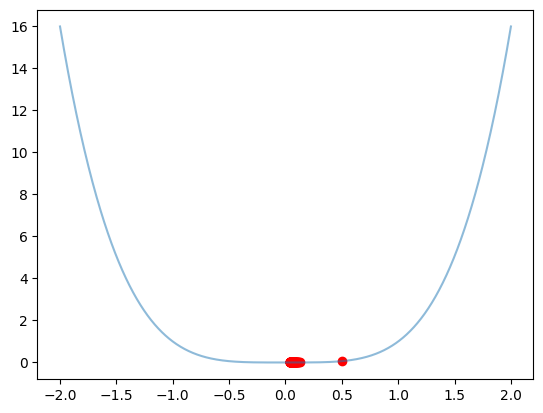

In [161]:
fig = plt.figure()
ax = plt.axes()
x = np.linspace(-2, 2, 1000)
ax.plot(x, f(x), alpha = 0.5)
x_approx = approximations
ax.scatter(x_approx, f(x_approx), color = "r")